# ICS2123 TAREA 3
Por Fernando M. Jara García y Luciano Díaz

In [6]:
import random
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.stats import poisson

# Pregunta 1

## Pregunta 1.a)

In [7]:
posiciones_validas = [[i,j] for i in range(8) for j in range(8)]

def matriz_ajedrez(n):
    return np.zeros((n,n))

def movimientos_factibles(pos_actual: list) -> list:
    """ 
    funcion que retorna una lista de movimientos factibles para Will dada su pos_actual
    """ 
    resultado = [pos_actual]
    resultado.extend([[pos_actual[0] + i, pos_actual[1]] for i in [-2, -1, 1, 2]])
    resultado.extend([[pos_actual[0], pos_actual[1] + i] for i in [-2, -1, 1, 2]])
    return [i for i in filter(lambda x: x in posiciones_validas, resultado)]

def int_a_coord(pos: int):
    """
    Funcion que tracue pos de forma int a coordenadas
    """
    return[pos // 8, pos % 8]
    
def matriz_transicion_will() -> np.matrix:
    """ 
    funcion que retorna la nueva posición de will, dada su pos_actual.
    """
    matriz = matriz_ajedrez(64)
    for i in range(8):
        for j in range(8):
            for p in range(8):
                for q in range(8):
                    if [p,q] in movimientos_factibles([i,j]):
                        matriz[8 * i + j][8 * p + q] = 1/len(movimientos_factibles([i,j]))
    return matriz

#Esta función la saqué de StackOverflow
def printear_matriz_completa(matriz):
    print("       ", end="")
    for i in range(8):
        for j in range(8):
            print(f"[{i},{j}]", end="   ")
    print("\n" + "-" * (len("   ") * 64)) 

    for idx, fila in enumerate(matriz):
        coord = int_a_coord(idx)
        print(f"{coord}: ", end="")  
        for valor in fila:
            print(f"{valor:.2f}".ljust(8), end="") 
        print() 
#Revisar que las filas de la matriz sumen 1. Si falla; raise AsertionError y no se muestra la matriz
for i in range(64):
    assert(round(sum(matriz_transicion_will()[i]), 6) == 1)

printear_matriz_completa(matriz_transicion_will())
#print(f'Probabilidad de ransición desde [0,0]: {matriz_transicion_will()[0]}')
#print(len( matriz_transicion_will()[0] ))
#print('')
#print(f'Probabilidad de ransición desde [1,1]: {matriz_transicion_will()[9]}')


       [0,0]   [0,1]   [0,2]   [0,3]   [0,4]   [0,5]   [0,6]   [0,7]   [1,0]   [1,1]   [1,2]   [1,3]   [1,4]   [1,5]   [1,6]   [1,7]   [2,0]   [2,1]   [2,2]   [2,3]   [2,4]   [2,5]   [2,6]   [2,7]   [3,0]   [3,1]   [3,2]   [3,3]   [3,4]   [3,5]   [3,6]   [3,7]   [4,0]   [4,1]   [4,2]   [4,3]   [4,4]   [4,5]   [4,6]   [4,7]   [5,0]   [5,1]   [5,2]   [5,3]   [5,4]   [5,5]   [5,6]   [5,7]   [6,0]   [6,1]   [6,2]   [6,3]   [6,4]   [6,5]   [6,6]   [6,7]   [7,0]   [7,1]   [7,2]   [7,3]   [7,4]   [7,5]   [7,6]   [7,7]   
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[0, 0]: 0.20    0.20    0.20    0.00    0.00    0.00    0.00    0.00    0.20    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.20    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   

## Pregunta 1.b)

In [8]:
def movimientos_factibles_chris(pos_actual: list) -> list:
    """
    Funcion que retorna una lista con los movimientos factibles de Chris
    """
    resultado = [
        [pos_actual[0] + 2, pos_actual[1] + 1],  
        [pos_actual[0] + 2, pos_actual[1] - 1],  
        [pos_actual[0] - 2, pos_actual[1] + 1],  
        [pos_actual[0] - 2, pos_actual[1] - 1],  
        [pos_actual[0] + 1, pos_actual[1] + 2],  
        [pos_actual[0] + 1, pos_actual[1] - 2],  
        [pos_actual[0] - 1, pos_actual[1] + 2],  
        [pos_actual[0] - 1, pos_actual[1] - 2],  
    ]
    
    # Filtramos los movimientos que están dentro del tablero (rango 0-7 en ambos ejes)
    return [i for i in resultado if i in posiciones_validas]

def matriz_transicion_chris() -> np.matrix:
    """ 
    Funcion que crea la matriz de transición de Chris. Se asume que este no se puede mantener en su lugar
    """
    matriz = matriz_ajedrez(64)
    for i in range(64):
        for j in range(64):
            if int_a_coord(j) in movimientos_factibles_chris(int_a_coord(i)):
                matriz[i][j] = 1 / len(movimientos_factibles_chris(int_a_coord(i)))
    return matriz

printear_matriz_completa(matriz_transicion_chris())
    

       [0,0]   [0,1]   [0,2]   [0,3]   [0,4]   [0,5]   [0,6]   [0,7]   [1,0]   [1,1]   [1,2]   [1,3]   [1,4]   [1,5]   [1,6]   [1,7]   [2,0]   [2,1]   [2,2]   [2,3]   [2,4]   [2,5]   [2,6]   [2,7]   [3,0]   [3,1]   [3,2]   [3,3]   [3,4]   [3,5]   [3,6]   [3,7]   [4,0]   [4,1]   [4,2]   [4,3]   [4,4]   [4,5]   [4,6]   [4,7]   [5,0]   [5,1]   [5,2]   [5,3]   [5,4]   [5,5]   [5,6]   [5,7]   [6,0]   [6,1]   [6,2]   [6,3]   [6,4]   [6,5]   [6,6]   [6,7]   [7,0]   [7,1]   [7,2]   [7,3]   [7,4]   [7,5]   [7,6]   [7,7]   
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[0, 0]: 0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.50    0.00    0.00    0.00    0.00    0.00    0.00    0.50    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   

In [9]:
n = 15
x0_will = 0
x0_chris = 54

def elevar(matriz: np.matrix, potencia: int) -> np.matrix:
    """Funcion auxiliar que eleva matrices"""
    return np.linalg.matrix_power(matriz, potencia)

#Calcular la probabilidad solicitada
probabilidad = 0
for j in range(n + 1): #Notar que lo deje como n+1 para que, en efecto, ocurran hasta n transiciones
    Mwill = elevar(matriz_transicion_will(), j)
    Mchris = elevar(matriz_transicion_chris(), j)
    for i in range(64):
        try:
            p,q = int_a_coord(i)
            probabilidad += Mwill[x0_will][i] * Mchris[x0_chris][i + 8]
        except IndexError:
            pass

print(f'Probabilidad de ver la bofetada en 15 o menos intentos: {round(probabilidad, 5) * 100}%')


Probabilidad de ver la bofetada en 15 o menos intentos: 19.357%


## Pregunta 1.c)

In [10]:
chris = matriz_transicion_chris()
resultado = []
#Este cuadro printeará si es posible para chris retornar a su estado inicial en transiciones impares.
#Si no printea nada, no será posible y se concluirá que esta es periodica de T = 2.
for k in range(2, 10**4):
    resultado.append((k, elevar(chris, k)[x0_chris][x0_chris]))
print([res[0] for res in resultado if res[0] % 2 != 0 and res[1] > 0])

[]


## Pregunta 1.d)


La probabilidad de que Will este en la casilla del Oscar, a largo plazo, es de: 1.45833%


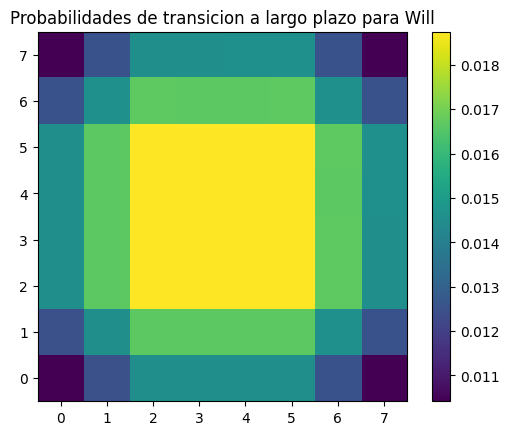

In [41]:
P = matriz_transicion_will()
A = np.transpose(np.identity(64) - P)
A = np.vstack([A, [1 for i in range(64)]])
b = np.transpose(np.array([0 for _ in range(64)] + [1]))
pi = np.linalg.lstsq(A, b, rcond = None)[0]
pi_reshape = np.reshape(pi, (8,8))
p_will = pi[pos_oscar] * 100
print(f'La probabilidad de que Will este en la casilla del Oscar, a largo plazo, es de: ' 
      f'{round(p_will, 5)}%')
plt.imshow(pi_reshape, interpolation = 'nearest', origin = 'lower')
plt.title('Probabilidades de transicion a largo plazo para Will')
plt.colorbar()
plt.show()

La probabilidad de que Chris se encuentre en la posicion del oscar, al largo plazo, es de:  1.19048%


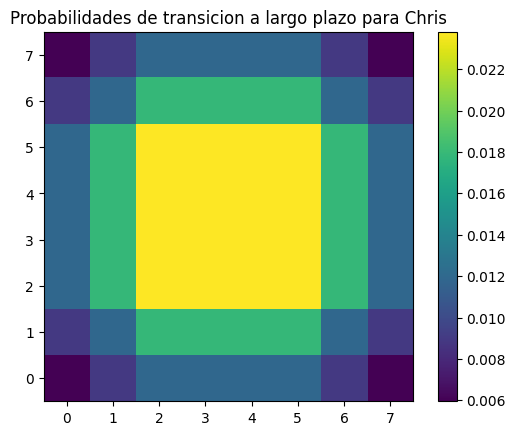

In [42]:
P = matriz_transicion_chris()
A = np.transpose(np.identity(64) - np.matrix(P))
A = np.vstack([A, [1 for i in range(64)]])
b = np.transpose(np.array([0 for _ in range(64)] + [1]))
pi = np.linalg.lstsq(A, b, rcond = None)[0]
pi_reshape = np.reshape(pi, (8,8))
p_chris = pi[pos_oscar] * 100
print(f'La probabilidad de que Chris se encuentre en la posicion del oscar, al largo plazo, es de: '
      f' {round(p_chris, 5)}%')
plt.imshow(pi_reshape, interpolation = 'nearest', origin = 'lower')
plt.title('Probabilidades de transicion a largo plazo para Chris')
plt.colorbar()
plt.show()

A simple vista los gráficos se ven iguales, pero este no es el caso. Las probabilidades de Chris tienen un rango más alto, es mucho menos probable que este en lugares remotos en comparacion a Will y es mucho más probable que este en el centro.

Por otro lado, la distribuición de Will es más estable y lineal, dado que el rango de probabilidades es menor y las prob. estan distribuidas de manera más uniforme a lo largo del tablero

# Pregunta 2

## Pregunta 2.a

### Cálculo teórico

In [44]:
from scipy.stats import gamma
from scipy.integrate import quad

lambda_1 = 10  
lambda_2 = 20  

def integrand(x, lambda_1, lambda_2):
    f_x = gamma.pdf(x, 2, scale=1/lambda_1)
    F_y = gamma.cdf(x, 3, scale=1/lambda_2)
    return f_x * F_y
integral, _ = quad(integrand, 0, np.inf, args=(lambda_1, lambda_2))

print(f"La probabilidad teórica calculada mediante integración es: {1-integral}")

La probabilidad teórica calculada mediante integración es: 0.40740740740740744


### Cálculo simulado

In [43]:
lambda_1 = 10  
lambda_2 = 20  
n_simulacion = 1000000

llegadas_compania_1 = np.random.gamma(2, 1 / lambda_1, n_simulacion)
llegadas_compania_2 = np.random.gamma(3, 1 / lambda_2, n_simulacion)

probabilidad = np.mean(llegadas_compania_1 < llegadas_compania_2)
print(f"La probabilidad de que el segundo bus de la compañía 1 llegue antes que el tercer bus de la compañía 2 es: {probabilidad:.4f}")

La probabilidad de que el segundo bus de la compañía 1 llegue antes que el tercer bus de la compañía 2 es: 0.4074


## Pregunta 2.b

In [61]:
lambda_1 = 10 
t = 3 

prob_10_buses_teo = poisson.pmf(10, lambda_1 * t)
prob_40_buses_teo = poisson.pmf(40, lambda_1 * t)

num_simulations = 100000

simulations_10_buses = np.random.poisson(lambda_1 * t, num_simulations)
empirico_prob_10_buses = np.mean(simulations_10_buses == 10)

simulations_40_buses = np.random.poisson(lambda_1 * t, num_simulations)
empirico_prob_40_buses = np.mean(simulations_40_buses == 40)

print(f"Probabilidad teórica de 10 buses hasta las 11:00: {prob_10_buses_teo:.6f}")
print(f"Probabilidad empírica de 10 buses hasta las 11:00: {empirico_prob_10_buses:.6f}")
print(f"Probabilidad teórica de 40 buses entre las 9:00 y las 12:00: {prob_40_buses_teo:.6f}")
print(f"Probabilidad empírica de 40 buses entre las 9:00 y las 12:00: {empirico_prob_40_buses:.6f}")
print(f"_______________________________________________________________________________________________")
print(f"Probabilidad teórica INTERSECCIÓN: {prob_10_buses_teo*prob_40_buses_teo}")
print(f"Probabilidad empírica INTERSECCIÓN: {empirico_prob_10_buses*empirico_prob_40_buses}")

Probabilidad teórica de 10 buses hasta las 11:00: 0.000015
Probabilidad empírica de 10 buses hasta las 11:00: 0.000020
Probabilidad teórica de 40 buses entre las 9:00 y las 12:00: 0.013943
Probabilidad empírica de 40 buses entre las 9:00 y las 12:00: 0.014150
_______________________________________________________________________________________________
Probabilidad teórica INTERSECCIÓN: 2.1231746526198017e-07
Probabilidad empírica INTERSECCIÓN: 2.8300000000000003e-07


## Pregunta 2.c

In [53]:
alpha = 50  
T = 0.5  
num_simulaciones = 10000  
tiempos_de_espera = []

for _ in range(num_simulaciones):
    num_pasajeros = np.random.poisson(alpha * T)
    
    if num_pasajeros > 0:
        llegadas = np.random.uniform(0, T, num_pasajeros)
        tiempos_espera_pasajeros = T - llegadas
        tiempos_de_espera.extend(tiempos_espera_pasajeros)

promedio_espera = np.mean(tiempos_de_espera)

print(f"Tiempo promedio de espera empírico: {promedio_espera * 60} minutos")

t0 = 19.5
t_bus = 20.0 
resultato_teorico = (t_bus - t0) / 2
print(f"Tiempo promedio de espera (teórico): {resultato_teorico} horas")


Tiempo promedio de espera empírico: 14.982089699294821 minutos
Tiempo promedio de espera (teórico): 0.25 horas


## Pregunta 2.d

### Teorico

In [54]:
from scipy.integrate import dblquad
lmb = 50 / 60  
a, b = 15, 30                    
beta = 1 / 5                     

def f_T2(t2):
    return beta * np.exp(-beta * t2)


def f_T1(t1):
    return 1 / (b - a)

def prob_condicinal(t1, t2):
    prob = 0.0
    lambda_t1 = lmb * t1
    lambda_t2 = lmb * t2
    
    for k in range(20):  
        p_n2_k = poisson.pmf(k, lambda_t2)
        p_n1_mayor_3k = 1 - poisson.cdf(3 * k, lambda_t1)
        prob += p_n2_k * p_n1_mayor_3k

    return prob

def integrand(t1, t2):
    return prob_condicinal(t1, t2) * f_T1(t1) * f_T2(t2)

result, error = dblquad(integrand, 0, np.inf, lambda t1: a, lambda t1: b)

print(f"Probabilidad aproximada de que el bus 1 reciba más de tres veces los pasajeros del bus 2: {result}")


Probabilidad aproximada de que el bus 1 reciba más de tres veces los pasajeros del bus 2: 0.7372072324555998


### Simulacion

In [48]:
n_simulacion = 1000000    

count = 0

for _ in range(n_simulacion):
    T1 = np.random.uniform(a, b)           
    T2 = np.random.exponential(1 / beta)   

    N1 = np.random.poisson(lmb * T1)
    N2 = np.random.poisson(lmb * T2)

    if N1 > 3 * N2:
        count += 1
prob = count / n_simulacion
print(f"La probabilidad estimada de que el bus 1 reciba más de tres veces los pasajeros del bus 2 es: {prob}")


La probabilidad estimada de que el bus 1 reciba más de tres veces los pasajeros del bus 2 es: 0.73779


## Pregunta 2.e

### Teorico

In [49]:
def calcular_probabilidad_poisson(lambda_2, k_max):
    probabilidad = poisson.cdf(k_max, lambda_2)
    return probabilidad

lambda_2 = 13.3
k_max = 20

probabilidad = calcular_probabilidad_poisson(lambda_2, k_max)

print(f"La probabilidad de que el número de vendedores que intentaron vender al bus 2 sea a lo más {k_max} es: {probabilidad}")


La probabilidad de que el número de vendedores que intentaron vender al bus 2 sea a lo más 20 es: 0.9692497649696451


### Simulacion

In [50]:
def simular_vendedores_poisson(lambda_2, k_max, num_simulaciones=100000):
    simulaciones = np.random.poisson(lambda_2, num_simulaciones)
    
    exitos = np.sum(simulaciones <= k_max)
    probabilidad_estimada = exitos / num_simulaciones
    
    return probabilidad_estimada

lambda_2 = 13.3
k_max = 20 
num_simulaciones = 100000
probabilidad_simulada = simular_vendedores_poisson(lambda_2, k_max, num_simulaciones)

print(f"La probabilidad estimada mediante simulación de que el número de vendedores que intentaron vender al bus 2 sea a lo más {k_max} es: {probabilidad_simulada}")


La probabilidad estimada mediante simulación de que el número de vendedores que intentaron vender al bus 2 sea a lo más 20 es: 0.96869


# Pregunta 3

## Pregunta 3.2.c
Encontrar el valor esperado de estrellas avisadas en la jornada completa. Considerando que se avistaron 3 estrellas de las 00:00am a las 05:30am.

Como la espernaza es lineal, podemos definirla como el valor esperado hasta las 05:30 más el valor esperado hasta las 24:00.

In [14]:
esperanza = 3
import math
import numpy as np
import matplotlib.pyplot as plt

def estrellas_avistadas() -> int:
    return random.randint(1,3)

def lmb(t: float) -> float:
    if 0 <= t <= 6:
        return 10 / (t + 1)
    elif 6 < t < 18:
        return t / 3
    elif 18 <= t <= 24:
        return math.exp(t / 6)

lmbda = np.vectorize(lmb)

def avistamientos(t: float, k: float) -> float:
    resultado = (lmbda(t) * t) ** k * np.exp(-lmbda(t) * t) / math.factorial(k) 
    return resultado

# #grafico por curiosidad
# dominio = np.linspace(5.5, 24, 5000)
# for k in range(0, 100, 5):
#     plt.plot(dominio, avistamientos(dominio, k), label = f'K: {k}')
# plt.legend()
# # plt.show()  

esp_num = 0
for t in np.linspace(5.5, 24, 10**4):
    esp_num += (24 - 5.5) / (10 ** 4) * lmbda(t) #calcular la integral a mano   
esp_num *= 2
esp_num += 3
esp_teorica = 3 + 2 * (10 * np.log(7 / 6.5) + 6 * ( np.exp(4) - np.exp(3) ) + 48)
print(f'Esperanza teórica: {round(esp_teorica, 2)}')
print(f'Esperanza númerica: {round(esp_num, 2)}')

Esperanza teórica: 514.63
Esperanza númerica: 514.66


## Pregunta 3.2.d

In [15]:
lmb = 10 * math.log(7)
#lmb = 19.46 approx

p1 = poisson.pmf(2, lmb) / 3
p2 = poisson.pmf(3, lmb) / 9
p3 = poisson.pmf(4, lmb) / 81

resultado = p1 + p2 + p3
print(f'La probabilidad de ver 4 estrellas antes de las'
      f' 06:00 es de {round(resultado * 100, 8)}%')

La probabilidad de ver 4 estrellas antes de las 06:00 es de 9.676e-05%
